# Linearna regresija

Linearna regresija je metoda statističke analize podataka koja se bavi traženjem ovisnosti između dvije ili više varijabli. Često se koristi se za određivanje "modela predikcije" za podatke koji na prvu izgledaju nasumično, te ukazuje na neke pravilnosti u njima. Primjeri korištenja su dijagnoza bolesti ili cijene dionica.

Postoje dva tipa linearne regresije, jednostavna linearna regresija (ovisnost jedne varijable ($y$) o jednoj
nezavisnoj varijabli ($x$)) i multivarijantna regresija (ovisnost o više varijabli).

**Nezavisna varijabla** je varijabla čiju vrijednost određuje osoba koja provodi pokus.

**Zavisna varijabla** je varijabla čije vrijednosti ovise o vrijednosti neovisne varijable.

## Jednostavna linearna regresija

Jednostavna linearna regresija je linearni regresijski model sa jednom neovisnom varijablom dan formulom: 
$$
y(x) = \alpha_0 + \alpha_1x
$$


Metoda traži linearnu funkciju koja na najbolji mogući način opisuje ovisnost varijabli.

#### Metoda najmanjih kvadrata

Za rješavanje ovakvih vrsta problema koristi se metodu najmanjih kvadrata.
Od nekog pravca $ y(x) = \alpha_0 + \alpha_1x $ točka ($x_i , y_i$) odstupa za $\epsilon_i$ pa možemo pisati: $ y(x) = \alpha_0 + \alpha_1x + \epsilon_i$ Princip: Od svih pravaca regresije najvjerojatniji je onaj za koji je suma kvadrata odstupanja minimalna.
$$ S(\alpha_0 , \alpha_1)  =  \sum\limits_{i = 1}^{n} {\epsilon_i}^2  =  \sum\limits_{i = 1}^{n} (y_i - (\alpha_1x_i + \alpha_0))^2  =  min $$ 

$$  \frac{\partial S(\alpha_0 , \alpha_1)}{\partial \alpha_0}
   = 0  ,  \frac{\partial S(\alpha_0 , \alpha_1)}{\partial \alpha_1}
   = 0 $$
   
Rješavanjem ove dvije jednadžbe dobivamo rješenja za $ \alpha_0 $ i $\alpha_1.$

$$\alpha_1 = \frac{\sum\limits_{i = 1}^{n} {(x_i - \bar{x})(y_i - \bar{y})}} {\sum\limits_{i = 1}^{n} {({x_i - \bar{x}})^2}} $$

$$ \alpha_0 = \bar{y} - \alpha_1\bar{x} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
def najmanjiKvadrati(X, Y):
    xmean = np.mean(X)
    ymean = np.mean(Y)
    alpha1 = sum((X - xmean) * (Y - ymean)) / sum((X - xmean)**2)
    alpha0 = ymean - xmean * alpha1
    return alpha0, alpha1

### Primjer - Ovisnost težine o visini

Na skupu od 10000 podataka o visinama i težinama muškaraca i žena slijedi primjena metode jednostavne linearne regresije. Opisat ću ovisnost zavisne varijable *težina* o nezavisnoj varijabli *visina*. Podaci su preuzeti sa sljedećeg linka: https://github.com/Dataweekends/zero_to_deep_learning_udemy/blob/master/data/weight-height.csv

In [3]:
visinaTezina = pd.read_csv('weight-height.csv')

visinaTezina.rename(columns = {visinaTezina.columns[0]: 'Spol'}, inplace = True)
visinaTezina.rename(columns = {visinaTezina.columns[1]: 'Visina (cm)'}, inplace = True)
visinaTezina.rename(columns = {visinaTezina.columns[2]: 'Težina (kg)'}, inplace = True)
visinaTezina['Visina (cm)'] = visinaTezina['Visina (cm)'].apply(lambda x: x * 2.54) # Inči -> centimetri
visinaTezina['Težina (kg)'] = visinaTezina['Težina (kg)'].apply(lambda x: x / 2.2) # Lb -> kilogrami

Spol = {
 'Male': 'Muškarac',
 'Female': 'Žena',
}

visinaTezina.replace({'Spol': Spol}, inplace=True)
visinaTezina = visinaTezina.sort_values(by=['Spol', 'Visina (cm)'])
visinaTezina.head()

,Spol,Visina (cm),Težina (kg)
4794,Muškarac,148.353539,55.153783
2334,Muškarac,150.826850,61.995912
4637,Muškarac,152.064918,53.547201
2191,Muškarac,152.244170,64.299809
1942,Muškarac,152.353937,51.319518


In [4]:
visinaTezina.tail() # Vidimo da su sortirani

,Spol,Visina (cm),Težina (kg)
5103,Žena,182.857792,80.620910
8635,Žena,183.105329,87.514029
7856,Žena,183.552461,85.653320
7162,Žena,183.971618,80.895242
7311,Žena,186.409548,86.399422


In [5]:
visina = visinaTezina['Visina (cm)']
tezina = visinaTezina['Težina (kg)']
visinaM = visinaTezina.set_index('Spol').filter(like='Muškarac', axis=0)['Visina (cm)']
tezinaM = visinaTezina.set_index('Spol').filter(like='Muškarac', axis=0)['Težina (kg)']
visinaZ = visinaTezina.set_index('Spol').filter(like='Žena', axis=0)['Visina (cm)']                                    
tezinaZ = visinaTezina.set_index('Spol').filter(like='Žena', axis=0)['Težina (kg)']

In [6]:
def plotaj(ax, i, visina, tezina, spol, color1, color2):
    ax[i].scatter(visina, tezina, c = color1)
    ax[i].set(title = spol)
    alpha, beta = najmanjiKvadrati(visina, tezina)
    ax[i].plot(visina, beta * visina + alpha, '-', color = color2)
    return alpha, beta

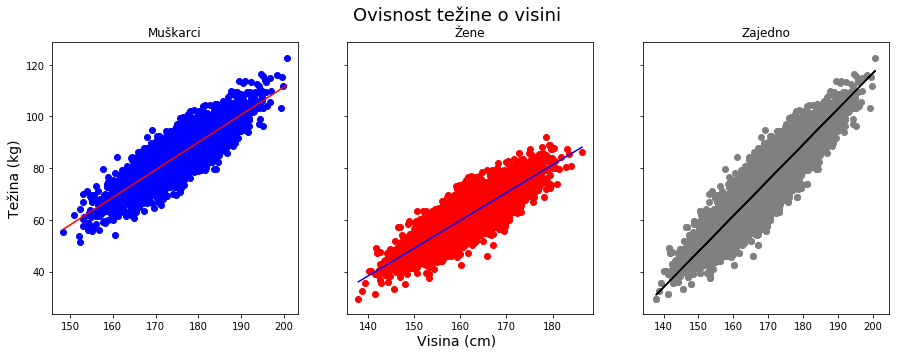

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey = True)
fig.suptitle("Ovisnost težine o visini", fontsize = 18)
fig.text(0.5, 0.04, 'Visina (cm)', ha='center', fontsize = 14)

alphaM, betaM = plotaj(ax, 0, visinaM, tezinaM, 'Muškarci', 'blue', 'red')
alphaZ, betaZ = plotaj(ax, 1, visinaZ, tezinaZ, 'Žene', 'red', 'blue')

ax[0].set_ylabel('Težina (kg)', fontsize = 14)

ax[2].scatter(visinaZ, tezinaZ, c = "grey")
alpha, beta = plotaj(ax, 2, visina, tezina, 'Zajedno', 'grey', 'black')

plt.show()

Metoda najmanjih kvadrata daje optimalno rješenje pod pretpostavkom da je stvarni model zaista linearan i da je šum u ciljnoj varijabli $y$ normalno raspodijeljen. To možemo provjeriti plotanjem reziduala - odstupanja od predviđene vrijednosti $\hat{y}$ za svaki od ulaznih primjera.

In [8]:
def reziduali(alpha, beta, X, Y):
    Y1 = alpha + beta*X
    return Y1 - Y

Izračunat ćemo normalnu fukciju gustoće evaluiranu u visini sa očekivanjem $\mu $ i devijacijom $\sigma$. Formula je:

$$ f(x | \mu , \sigma) = {\displaystyle {\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$$


In [9]:
import math as m

In [10]:
def normFjaGustoce(X, mi, sigma):
    korijen = m.sqrt(2 * m.pi * sigma**2)
    def power(x):
        return m.pow(m.e, - (x - mi)**2 / (2 * sigma**2))
    powerArray = np.vectorize(power)
    e_na = powerArray(X)
    return e_na / korijen

In [11]:
def graf_rezidual(ax1, reziduals, i, color1):
    n, bins, patches = ax1[i].hist(reziduals, bins=20, normed=True, color=color1, edgecolor='black')
    bincenters = 0.5*(bins[1:]+bins[:-1])
    fjaGustoce = normFjaGustoce(bincenters, np.mean(reziduals), np.std(reziduals))
    gaussovaKr = ax1[i].plot(bincenters, fjaGustoce, 'r--', linewidth=1)
    ax1[i].set_xlim(-20, 20)
    ax1[i].set_frame_on(False)

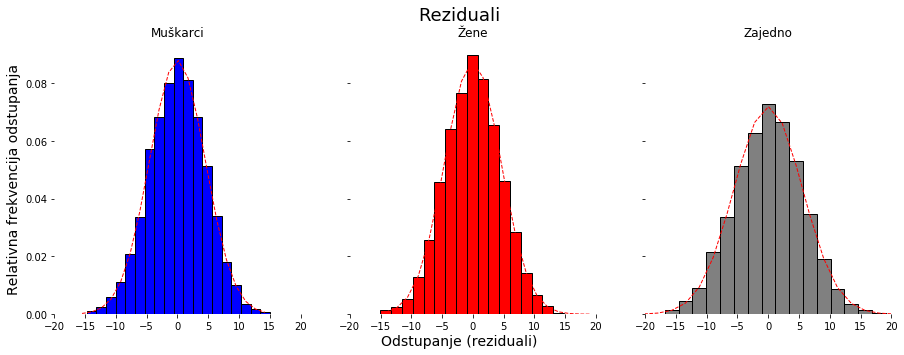

In [12]:
# Reziduali
fig1, ax1 = plt.subplots(1, 3, figsize=(15, 5), sharey = True)
fig1.suptitle("Reziduali", fontsize = 18)
fig1.text(0.5, 0.04, 'Odstupanje (reziduali)', ha='center', fontsize = 14)

rezidualiM = reziduali(alphaM, betaM, visinaM, tezinaM)
graf_rezidual(ax1, rezidualiM, 0, 'blue')
ax1[0].set_ylabel('Relativna frekvencija odstupanja', fontsize = 14)
ax1[0].set(title = 'Muškarci')


rezidualiZ = reziduali(alphaZ, betaZ, visinaZ, tezinaZ)
graf_rezidual(ax1, rezidualiZ, 1, 'red')
ax1[1].set(title = 'Žene')

rezidualiUkupno = reziduali(alpha, beta, visina, tezina)
graf_rezidual(ax1, rezidualiUkupno, 2, 'grey')
ax1[2].set(title = 'Zajedno')

plt.show()

Vidimo da je šum u ciljnoj varijabli $težina$  normalno raspodijeljen. Metoda najmanjih kvadrata daje optimalno rješenje.

Dobivene jednadžbe ovisnosti težine $T$ (kg) o visini $x$ (cm) sa našeg skupa podataka:

Muškarci: $ T_m(x) = 1.067x - 102.05 $

Žene: $ T_z(x) = 1.073x - 111.82 $

Zajedno: $ T(x) = 1.381x - 159.42 $



Pogledajmo sada što se događa kada transformiramo vrijednosti funkcije na primjer funkcijom $x^5$.

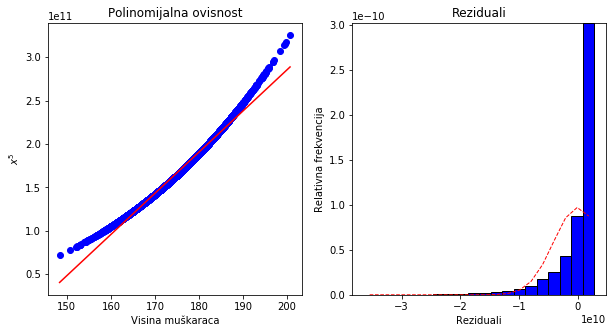

In [13]:
tezinaMKvadrat = tezinaM + visinaM**5

fig1, ax = plt.subplots(1, 2, figsize=(10, 5))

alphaM, betaM = najmanjiKvadrati(visinaM, tezinaMKvadrat)

ax[0].scatter(visinaM, tezinaMKvadrat, c = "blue")
ax[0].plot(visinaM, betaM * visinaM + alphaM, '-', color = 'red')
ax[0].set(xlabel = 'Visina muškaraca', ylabel = '$x^5$', title = 'Polinomijalna ovisnost')

rezidualiM = reziduali(alphaM, betaM, visinaM, tezinaMKvadrat)
n, bins, patches = ax[1].hist(rezidualiM, bins=20, normed=True, color='blue', edgecolor='black')
ax[1].set(xlabel = 'Reziduali', ylabel = 'Relativna frekvencija', title = 'Reziduali')
bincenters = 0.5*(bins[1:]+bins[:-1])
fjaGustoce = normFjaGustoce(bincenters, np.mean(rezidualiM), np.std(rezidualiM))
gaussovaKr = ax[1].plot(bincenters, fjaGustoce, 'r--', linewidth=1, label='Gaussova krivulja')

plt.show()

Kako više nemamo linearnu ovisnost nego polinomijalnu, to se lijepo iskazuje na grafu s rezidualima.

## Pie chart - omjer visina

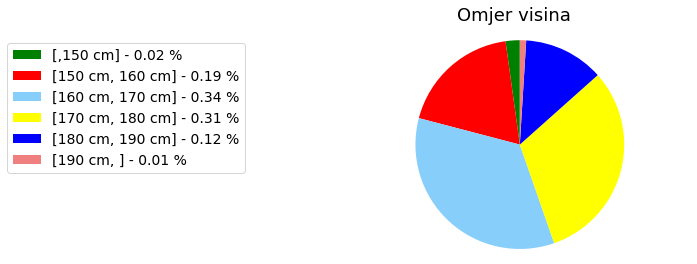

In [14]:
visina140 = visinaTezina.loc[visinaTezina['Visina (cm)'] <= 150]
visina150 = visinaTezina.loc[(visinaTezina['Visina (cm)'] > 150) & (visinaTezina['Visina (cm)'] <= 160)]
visina160 = visinaTezina.loc[(visinaTezina['Visina (cm)'] > 160) & (visinaTezina['Visina (cm)'] <= 170)]
visina170 = visinaTezina.loc[(visinaTezina['Visina (cm)'] > 170) & (visinaTezina['Visina (cm)'] <= 180)]
visina180 = visinaTezina.loc[(visinaTezina['Visina (cm)'] > 180) & (visinaTezina['Visina (cm)'] <= 190)]
visina190 = visinaTezina.loc[(visinaTezina['Visina (cm)'] > 190)]

visine = [visina140.size, visina150.size, visina160.size, visina170.size, visina180.size, visina190.size]
labels = '[,150 cm]', '[150 cm, 160 cm]', '[160 cm, 170 cm]', '[170 cm, 180 cm]', '[180 cm, 190 cm]', '[190 cm, ]'
colors = ['green','red','lightskyblue','yellow','blue','lightcoral']
porcent = 100 * visine / np.sum(visine)

fig1, ax1 = plt.subplots()
fig1.suptitle("Omjer visina", fontsize = 18)

ax1.axis('equal')

patches, texts = ax1.pie(visine, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, porcent)]

plt.legend(patches, labels, bbox_to_anchor=(-0.3, 1.), fontsize=14)

plt.show()

## Multivarijantna regresija

Kod multivarijantne regresije imamo linearnu ovisnost jedne zavisne varijable ($y$) o više nezavisnih varijabli ($x_1, x_2, … x_n$)
$$
y = \beta_0 + \beta_1x_1 + \dots + \beta_nx_n
$$

Za više varijabli nećemo pokazivati funkciju najmanjih kvadrata. Postoje biblioteke koje to rade za nas. Koristit ćemo **sklearn**-ovu LinearRegression klasu.


### Primjer - Ovisnost CO2 o godini i relativnoj temperaturi (dva feature-a)

Podaci su preuzeti sa stranice datahub.io. Linkovi: https://datahub.io/core/co2-fossil-global#data, https://datahub.io/core/global-temp. Gledat ćemo podatke od 1920. godine.

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
godinaco2 = pd.read_csv('year-co2.csv')
godinatemp = pd.read_csv('year-temp.csv')

In [17]:
# Pročišćavanje
godinaco2 =godinaco2.loc[:,godinaco2.columns.isin(['Year','Total'])]     
godinaco2 = godinaco2.loc[godinaco2['Year'] >= 1920]
godinaco2.columns=['Godina','CO2']         

godinatemp = godinatemp[godinatemp.Source != 'GISTEMP']   #Gledamo samo GCAG 
godinatemp.drop(['Source'],inplace=True, axis = 1)
godinatemp = godinatemp.reindex(index=godinatemp.index[::-1]) 
godinatemp = godinatemp.loc[godinatemp['Year'] >= 1920]
godinatemp = godinatemp.loc[godinatemp['Year'] <= 2010]
godinatemp.columns=['Godina','Temperatura']  
godinaco2.reset_index(drop=True, inplace=True)
godinatemp.reset_index(drop=True, inplace=True)

In [18]:
klimatska_promjena = pd.concat([godinatemp, godinaco2], axis = 1)
klimatska_promjena = klimatska_promjena.loc[:,~klimatska_promjena.columns.duplicated()]
klimatska_promjena.head()

,Godina,Temperatura,CO2
0,1920,-0.2105,932
1,1921,-0.1485,803
2,1922,-0.2304,845
3,1923,-0.2156,970
4,1924,-0.2486,963


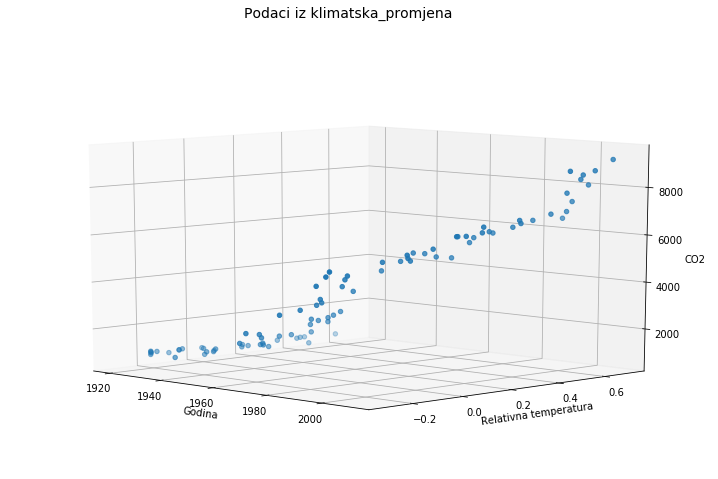

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(1, 1, 1, projection='3d')
fig.suptitle('Podaci iz klimatska_promjena', fontsize= 14)

ax.scatter(xs=klimatska_promjena['Godina'], ys=klimatska_promjena['Temperatura'], zs=klimatska_promjena['CO2'])

ax.set_ylabel('Relativna temperatura'); 
ax.set_xlabel('Godina');
ax.set_zlabel('CO2')

ax.view_init(10, -45)


In [20]:
X = klimatska_promjena.as_matrix(['Godina'])
Y = klimatska_promjena.as_matrix(['CO2', 'Temperatura']).astype('float32')
reg = LinearRegression()


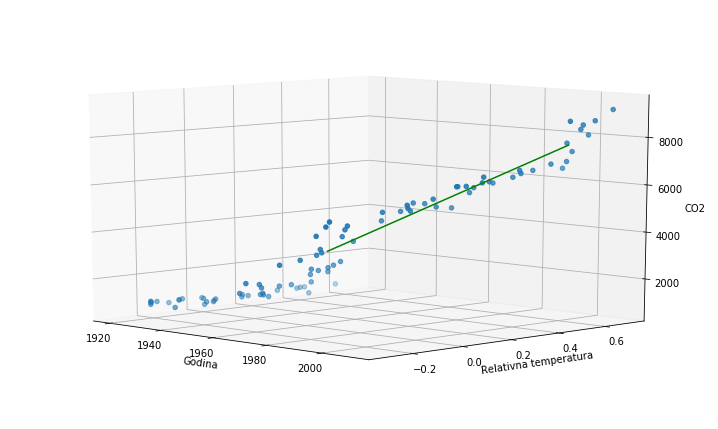

In [762]:
X = klimatska_promjena.as_matrix(['Godina'])

Y = klimatska_promjena.as_matrix(['CO2', 'Temperatura']).astype('float32')

reg = LinearRegression()
reg.fit(X, Y)

x_line = np.arange(1960, 2011).reshape(-1,1)
p = reg.predict(x_line).T

fig2 = plt.figure()
fig2.set_size_inches(12.5, 7.5)
ax = fig2.add_subplot(1, 1, 1, projection='3d')
ax.scatter(xs=klimatska_promjena['Godina'], ys=klimatska_promjena['Temperatura'], zs=klimatska_promjena['CO2'])
ax.set_ylabel('Relativna temperatura'); ax.set_xlabel('Godina'); ax.set_zlabel('CO2')
ax.plot(xs = x_line, ys = p[1], zs = p[0], color='green')
ax.view_init(10, -45)